In [80]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [81]:
# Adding datasheet to the file
gt= pd.read_csv('2021.Vans_Aggregated.csv')
gt.dropna()

,Manufacturer,Fuel Type,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%)
0,BMW AG,DIESEL,1,6.96,6.04,0.92,15.18,183.13,159.00,24.13,15.18,6.96,6.04,0.92,15.18,183.13,159.00,24.13,15.18
1,CHRYSLER,PETROL,5,8.29,6.59,1.69,25.68,188.77,150.20,38.57,25.68,8.05,6.59,1.46,22.20,183.33,150.03,33.31,22.20
2,PSA,PETROL,89,8.31,6.98,1.33,19.05,189.34,159.04,30.30,19.05,7.83,6.91,0.93,13.39,178.47,157.39,21.08,13.39
3,VOLVO,PETROL,31,8.98,7.24,1.75,24.14,204.63,164.84,39.80,24.14,8.51,7.24,1.27,17.59,193.97,164.95,29.02,17.59
4,OPEL AUTOMOBILE,DIESEL,6,5.34,4.83,0.52,10.73,140.63,127.00,13.63,10.73,5.15,4.62,0.53,11.52,135.53,121.52,14.01,11.52
5,SEAT,DIESEL,4,6.03,5.21,0.83,15.87,158.74,137.00,21.74,15.87,6.18,5.34,0.84,15.77,162.50,140.36,22.14,15.77
6,VOLVO,DIESEL,11,6.70,6.26,0.44,7.00,176.17,164.64,11.53,7.00,6.87,6.39,0.49,7.61,180.84,168.05,12.79,7.61
7,RENAULT,PETROL,3,6.94,5.38,1.56,28.88,158.09,122.67,35.42,28.88,5.67,5.29,0.38,7.15,129.24,120.62,8.62,7.15
8,AUTOMOBILES PEUGEOT,PETROL/ELECTRIC,1,6.48,1.36,5.11,375.84,147.51,31.00,116.51,375.84,6.48,1.36,5.11,375.84,147.51,31.00,116.51,375.84
9,FIAT GROUP,PETROL/ELECTRIC,1,2.93,1.98,0.96,48.51,66.83,45.00,21.83,48.51,2.93,1.98,0.96,48.51,66.83,45.00,21.83,48.51


In [82]:
gt.describe()

,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%)
count,40.000000,40.000000,40.000000,40.00000,40.00000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,166.675000,7.754750,6.118500,1.63675,44.11325,188.710000,149.757000,38.954500,44.11325,7.530000,5.995250,1.535250,42.707750,183.128500,146.638000,36.490500,42.707750
std,466.611758,2.668718,2.398913,1.31878,77.14578,63.136974,59.237536,29.598547,77.14578,2.672591,2.370039,1.371475,77.051112,62.869011,58.333849,30.911081,77.051112
min,1.000000,2.930000,1.340000,-0.41000,-5.35000,66.830000,30.440000,-9.260000,-5.35000,2.930000,1.360000,-0.420000,-5.570000,66.830000,31.000000,-9.640000,-5.570000
25%,2.750000,6.240000,5.225000,0.84500,13.59750,148.860000,126.167500,21.807500,13.59750,5.942500,5.052500,0.645000,12.000000,145.065000,121.295000,15.752500,12.000000
50%,27.000000,7.210000,6.150000,1.28500,19.51500,182.900000,146.505000,32.085000,19.51500,6.955000,5.915000,1.055000,16.270000,178.425000,143.045000,27.730000,16.270000
75%,59.750000,8.375000,7.060000,1.77000,31.77250,204.640000,169.842500,40.425000,31.77250,8.302500,6.992500,1.745000,30.175000,195.080000,168.722500,40.425000,30.175000
max,2450.000000,18.370000,12.970000,5.40000,375.84000,418.550000,295.500000,123.050000,375.84000,18.170000,12.490000,5.680000,375.840000,413.910000,284.460000,129.450000,375.840000


In [83]:
# Exclude non-numeric columns
numeric_data = gt.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_data.corr()
corr_matrix

,Number of vehicles,OBFCM Fuel consumption (l/100 km),WLTP Fuel consumption (l/100 km),absolute gap Fuel consumption (l/100 km),percentage gap Fuel consumption (%),OBFCM CO2 emissions (g/km),WLTP CO2 emissions (g/km),absolute gap CO2 emissions (g/km),percentage gap CO2 emissions (%),OBFCM Fuel consumption weighted (l/100 km),WLTP Fuel consumption weighted (l/100 km),absolute gap Fuel consumption weighted (l/100 km),percentage gap Fuel consumption weighted (%),OBFCM CO2 emissions weighted (g/km),WLTP CO2 emissions weighted (g/km),absolute gap CO2 emissions weighted (g/km),percentage gap CO2 emissions weighted (%)
Number of vehicles,1.000000,0.002723,0.076953,-0.134615,-0.116619,0.068406,0.130842,-0.115954,-0.116619,-0.011006,0.073374,-0.148335,-0.120984,0.052486,0.127828,-0.134520,-0.120984
OBFCM Fuel consumption (l/100 km),0.002723,1.000000,0.869644,0.441777,-0.170576,0.975163,0.814878,0.449254,-0.170576,0.991865,0.866738,0.434947,-0.166200,0.973135,0.816068,0.439187,-0.166200
WLTP Fuel consumption (l/100 km),0.076953,0.869644,1.000000,-0.058699,-0.588615,0.896885,0.980417,-0.049029,-0.588615,0.851559,0.994210,-0.058182,-0.584411,0.882866,0.978786,-0.051492,-0.584411
absolute gap Fuel consumption (l/100 km),-0.134615,0.441777,-0.058699,1.000000,0.724248,0.342064,-0.133848,0.997542,0.724248,0.458242,-0.054015,0.985270,0.725471,0.363493,-0.128435,0.981694,0.725471
percentage gap Fuel consumption (%),-0.116619,-0.170576,-0.588615,0.724248,1.000000,-0.234500,-0.608386,0.717402,1.000000,-0.145106,-0.578594,0.715791,0.998132,-0.208447,-0.599896,0.708159,0.998132
OBFCM CO2 emissions (g/km),0.068406,0.975163,0.896885,0.342064,-0.234500,1.000000,0.884914,0.362068,-0.234500,0.961434,0.888466,0.338109,-0.228992,0.990802,0.880610,0.353312,-0.228992
WLTP CO2 emissions (g/km),0.130842,0.814878,0.980417,-0.133848,-0.608386,0.884914,1.000000,-0.113755,-0.608386,0.792650,0.969989,-0.131154,-0.603409,0.865196,0.993585,-0.115364,-0.603409
absolute gap CO2 emissions (g/km),-0.115954,0.449254,-0.049029,0.997542,0.717402,0.362068,-0.113755,1.000000,0.717402,0.464453,-0.046119,0.983712,0.719191,0.381908,-0.110099,0.984542,0.719191
percentage gap CO2 emissions (%),-0.116619,-0.170576,-0.588615,0.724248,1.000000,-0.234500,-0.608386,0.717402,1.000000,-0.145106,-0.578594,0.715791,0.998132,-0.208447,-0.599896,0.708159,0.998132
OBFCM Fuel consumption weighted (l/100 km),-0.011006,0.991865,0.851559,0.458242,-0.145106,0.961434,0.792650,0.464453,-0.145106,1.000000,0.858442,0.465209,-0.137109,0.976628,0.804150,0.468788,-0.137109


In [84]:
# Kurtosis
kurtosis = numeric_data.kurtosis()
print("\nKurtosis:")
print(kurtosis)


Kurtosis:
Number of vehicles                                   17.324925
OBFCM Fuel consumption (l/100 km)                     6.545802
WLTP Fuel consumption (l/100 km)                      1.242359
absolute gap Fuel consumption (l/100 km)              1.768348
percentage gap Fuel consumption (%)                  10.588049
OBFCM CO2 emissions (g/km)                            4.039675
WLTP CO2 emissions (g/km)                             0.595110
absolute gap CO2 emissions (g/km)                     1.686431
percentage gap CO2 emissions (%)                     10.588049
OBFCM Fuel consumption weighted (l/100 km)            6.714858
WLTP Fuel consumption weighted (l/100 km)             0.957224
absolute gap Fuel consumption weighted (l/100 km)     2.111258
percentage gap Fuel consumption weighted (%)         10.598950
OBFCM CO2 emissions weighted (g/km)                   4.298026
WLTP CO2 emissions weighted (g/km)                    0.463601
absolute gap CO2 emissions weighted (g/km)  

In [85]:
# Skewness
skewness = numeric_data.skew()
print("\nSkewness:")
print(skewness)


Skewness:
Number of vehicles                                   4.095022
OBFCM Fuel consumption (l/100 km)                    2.067769
WLTP Fuel consumption (l/100 km)                     0.271364
absolute gap Fuel consumption (l/100 km)             1.493989
percentage gap Fuel consumption (%)                  3.258449
OBFCM CO2 emissions (g/km)                           1.549279
WLTP CO2 emissions (g/km)                            0.062483
absolute gap CO2 emissions (g/km)                    1.430238
percentage gap CO2 emissions (%)                     3.258449
OBFCM Fuel consumption weighted (l/100 km)           2.156260
WLTP Fuel consumption weighted (l/100 km)            0.283368
absolute gap Fuel consumption weighted (l/100 km)    1.628718
percentage gap Fuel consumption weighted (%)         3.251459
OBFCM CO2 emissions weighted (g/km)                  1.673209
WLTP CO2 emissions weighted (g/km)                   0.105822
absolute gap CO2 emissions weighted (g/km)           1.5638

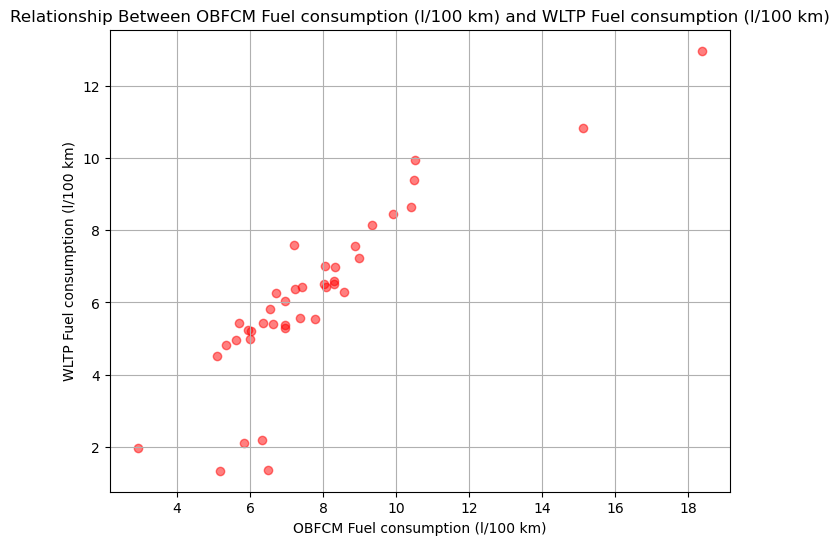

In [86]:

def create_relational_graph(x, y):
    """
    Create a scatter plot to visualize the relationship between two variables.

    Parameters:
    x (array-like): gt for the x-axis.
    y (array-like): gt for the y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='red', alpha=0.5)
    plt.xlabel('OBFCM Fuel consumption (l/100 km)')
    plt.ylabel('WLTP Fuel consumption (l/100 km)')
    plt.title('Relationship Between OBFCM Fuel consumption (l/100 km) and WLTP Fuel consumption (l/100 km)')
    plt.grid(True)
    plt.show()


create_relational_graph(gt['OBFCM Fuel consumption (l/100 km)'], gt['WLTP Fuel consumption (l/100 km)'])

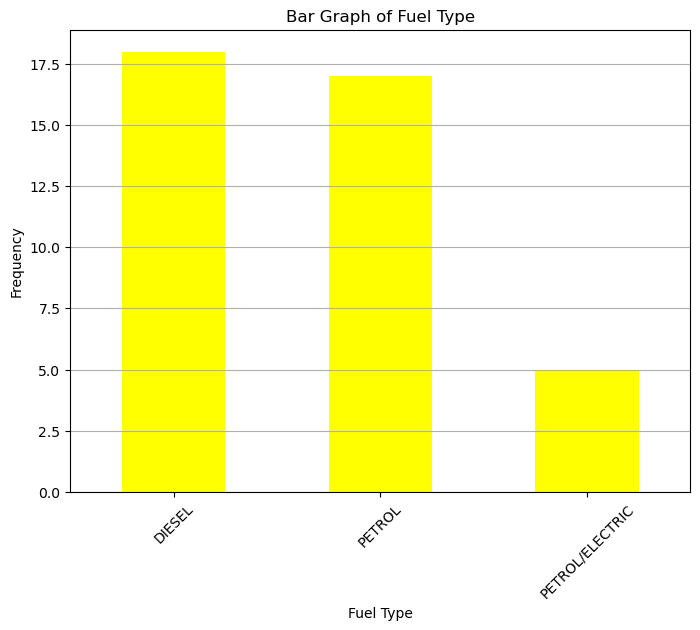

In [87]:
def plot_column_bar(data, column_name):
    """
    Create a bar graph to visualize the distribution of a specified categorical column in the dataset.

    Parameters:
    data (DataFrame): Pandas DataFrame containing the dataset.
    column_name (str): Name of the categorical column to visualize.

    Returns:
    None
    """
    # Count the frequency of each category
    category_counts = data[column_name].value_counts()

    # Plot the bar graph
    plt.figure(figsize=(8, 6))
    category_counts.plot(kind='bar', color='yellow')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph of {column_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
plot_column_bar(gt, 'Fuel Type')


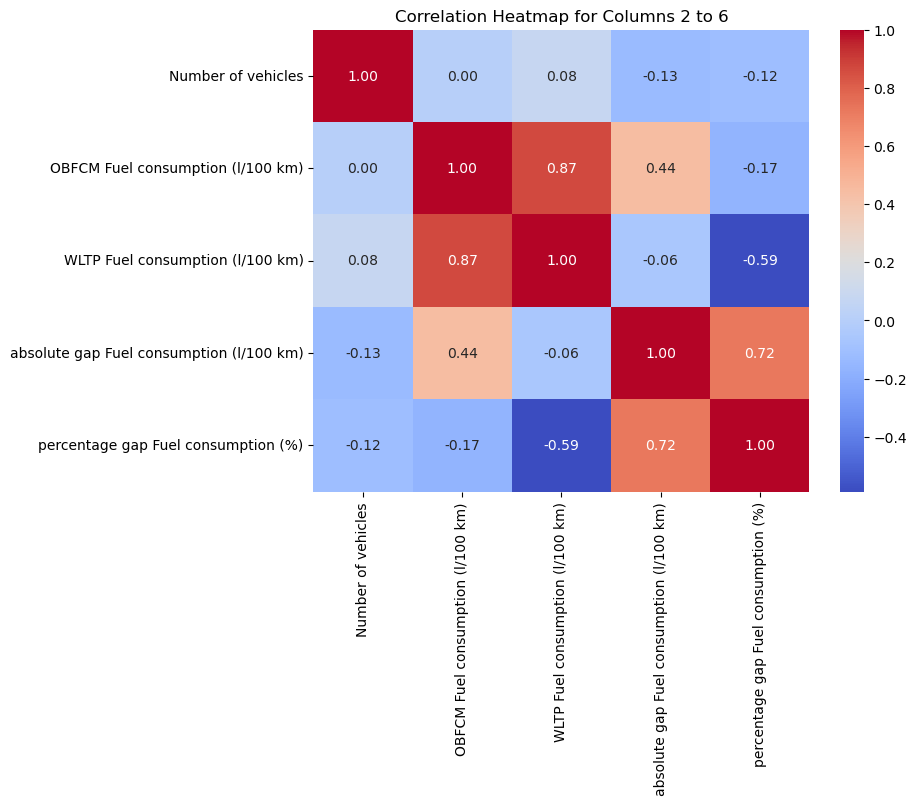

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_subset(data, start_column, end_column):
    """
    Create a heatmap to visualize the correlation matrix of a subset of columns in the data.

    Parameters:
    data (DataFrame): The input data.
    start_column (int): Index of the starting column.
    end_column (int): Index of the ending column.

    Returns:
    None
    """
    # Select the subset of columns
    subset_data = data.iloc[:, start_column:end_column+1]

    # Filter out non-numeric columns
    numeric_subset_data = subset_data.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_subset_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap for Columns {} to {}'.format(start_column, end_column))
    plt.show()

# Example usage for columns 2 to 6
plot_heatmap_subset(gt, 2, 6)

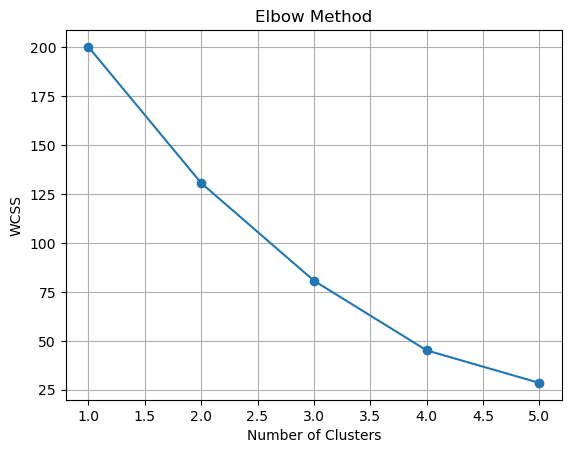

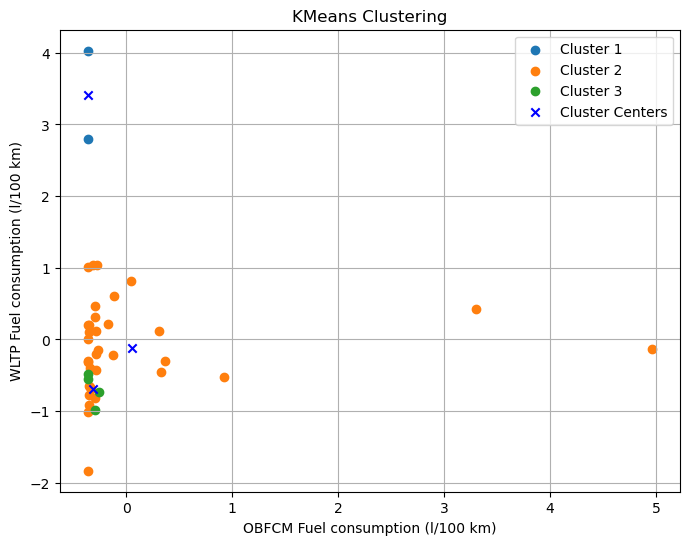

Silhouette Score: 0.6212859384801226


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv('2021.Vans_Aggregated.csv')

# Global variable for scaler
scaler = StandardScaler()

def preprocess_data(df):
    """
    Preprocess the data by handling missing values and selecting appropriate columns for clustering.

    Parameters:
        df: DataFrame containing the data.

    Returns:
        DataFrame: Preprocessed data.
    """
    # Select appropriate columns for clustering
    columns_for_clustering = ['Number of vehicles','OBFCM Fuel consumption (l/100 km)','WLTP Fuel consumption (l/100 km)','absolute gap Fuel consumption (l/100 km)','percentage gap Fuel consumption (%)']

    # Handle missing values
    df.dropna(subset=columns_for_clustering, inplace=True)
    
    return df[columns_for_clustering]

def performing_elbow_method(data_scaled):
    """
    Calculate the optimal number of clusters using the elbow method.

    Parameters:
        data_scaled: Rescaled data.

    Returns:
        integer: Optimal number of clusters.
    """
    # within cluster sum of squares
    wcss = []
    # Adjusted range to avoid ValueError
    for i in range(1, 6):
        kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)  # Explicitly setting n_init
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    # Plotting the within-cluster sum of squares
    plt.plot(range(1, 6), wcss, marker='o')
    # Adding labels and title to the plot
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    # Adding grid
    plt.grid(True)
    plt.show()
    return 3

def visualize_clusters(data_scaled, optimal_num_clusters):
    """
    Visualizing the clusters based on the number of clusters.

    Parameters:
        data_scaled: Rescaled data.
        optimal_num_clusters: Optimal number of clusters.
    """
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    cluster_centers = kmeans.cluster_centers_
    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    for cluster_label in range(optimal_num_clusters):
        plt.scatter(data_scaled[cluster_labels == cluster_label, 0],
                    data_scaled[cluster_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label + 1}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='blue', label='Cluster Centers')
    # Adding labels and title to the plot
    plt.xlabel('OBFCM Fuel consumption (l/100 km)')
    plt.ylabel('WLTP Fuel consumption (l/100 km)')
    plt.title('KMeans Clustering')
    plt.legend()
    # Adding grid
    plt.grid(True)
    plt.show()
    
    
def evaluate_clustering_accuracy(data_scaled, optimal_num_clusters):
    """
    Evaluate the accuracy of clustering predictions using silhouette score.

    Parameters:
        data_scaled: Rescaled data.
        optimal_num_clusters: Optimal number of clusters.

    Returns:
        float: Silhouette score.
    """
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    return silhouette_avg

# Preprocessing the data
data_processed = preprocess_data(data)

# Standardizing the data
data_scaled = scaler.fit_transform(data_processed)


# Performing the elbow method to determine the optimal number of clusters
optimal_num_clusters = performing_elbow_method(data_scaled)

# Visualizing the clusters
visualize_clusters(data_scaled, optimal_num_clusters)



# Evaluating clustering accuracy
silhouette_accuracy = evaluate_clustering_accuracy(data_scaled, optimal_num_clusters)
print("Silhouette Score:", silhouette_accuracy)


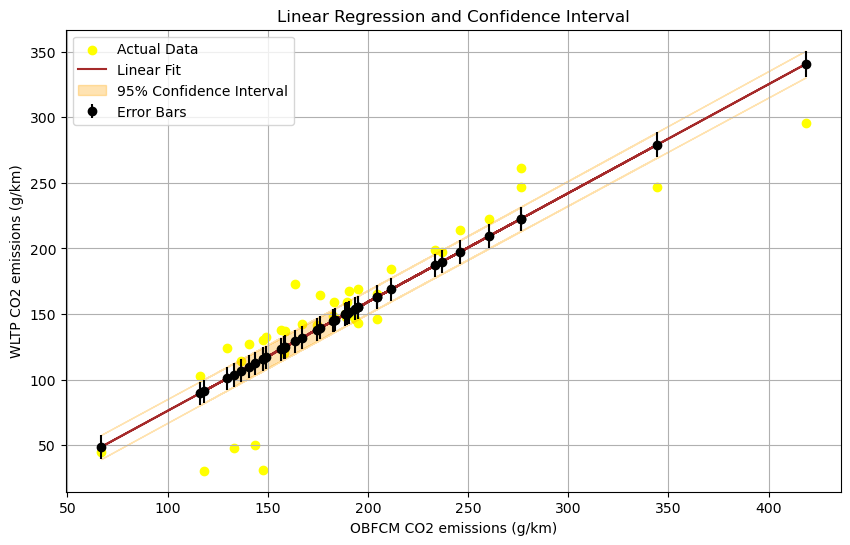

In [90]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
data = gt.head(n=40)
def line_fit_and_plot(data):
    """
    Fit a linear regression model to the provided data and plot the results.

    Parameters:
        data: DataFrame containing appropriate columns.
    """
    X = data['OBFCM CO2 emissions (g/km)'].values.reshape(-1)  # Independent variable
    y = data['WLTP CO2 emissions (g/km)'].values  # Dependent variable

    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)

    # Predictions
    y_pred = model.predict(X.reshape(-1, 1))

    # Confidence interval and error bars
    confidence = 0.95
    n = len(y)
    mse = np.mean((y - y_pred) ** 2)
    alpha = 1 - confidence
    t_critical = np.abs(stats.t.ppf(alpha / 2, df=n-1))
    margin_of_error = t_critical * np.sqrt((mse / n) * (1 + (1/n) + ((X - X.mean()) ** 2) / np.sum((X - X.mean()) ** 2)))
    confidence_interval = np.array([y_pred - margin_of_error, y_pred + margin_of_error])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='yellow', label='Actual Data')
    plt.plot(X, y_pred, color='brown', label='Linear Fit')
    plt.fill_between(X, confidence_interval[0], confidence_interval[1], color='orange', alpha=0.3, label='95% Confidence Interval')
    plt.errorbar(X, y_pred, yerr=margin_of_error, fmt='o', color='black', label='Error Bars')

    # Labels and title
    plt.xlabel('OBFCM CO2 emissions (g/km)')
    plt.ylabel('WLTP CO2 emissions (g/km)')
    plt.title('Linear Regression and Confidence Interval')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform line fitting and plot
line_fit_and_plot(data)

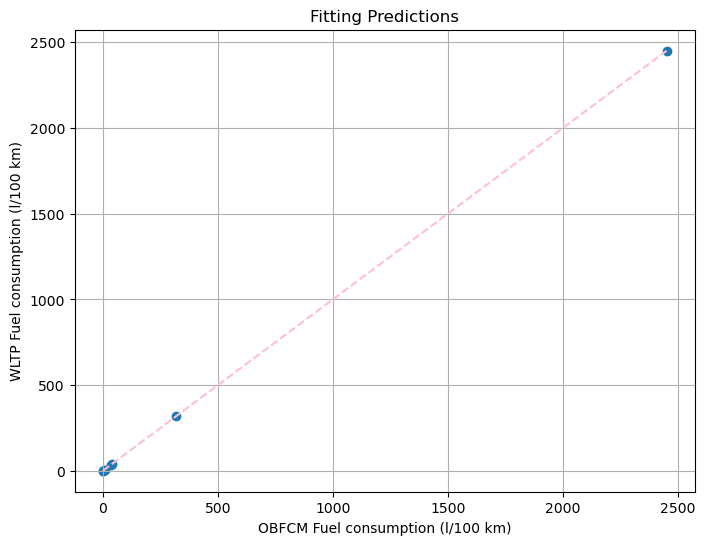

Mean Squared Error: 1.290306188288803e-24


In [91]:
# Preprocess the data
data_processed = preprocess_data(data)

# Define features (X) and target (y)
X = data_processed[['Number of vehicles','OBFCM Fuel consumption (l/100 km)','WLTP Fuel consumption (l/100 km)','absolute gap Fuel consumption (l/100 km)','percentage gap Fuel consumption (%)']]
y = data_processed['Number of vehicles']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Visualize the fitting predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='pink')  # Identity line
plt.xlabel('OBFCM Fuel consumption (l/100 km)')
plt.ylabel('WLTP Fuel consumption (l/100 km)')
plt.title('Fitting Predictions')
plt.grid(True)
plt.show()

print("Mean Squared Error:", mse)
